# Individual Data Generation Example
For the individual data generation, the probability to have a true positive label is dependant on the previous predictions for the individual. The number of positive and negative predictions defines, how close an individual is to the decision boundary.

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from aif360.algorithms.inprocessing import PrejudiceRemover
from methods.data.individual_data_generator import DataGenerator as IndDataGen
from methods.long_term_fairness import LongTermFairnessPlot
from methods.aif360.longterm_aif import AifLongTermMetric, AifLongTermPrediction

Import error: No module named 'tensorflow'


In [2]:
generator = IndDataGen(mean_pos=[0, 1],
                       mean_neg=[8, 9],
                       num_positive_label=100,
                       num_negative_label=100,
                       discrimination_factor=.9)

In [3]:
metric = AifLongTermMetric()

In [4]:
clf = AifLongTermPrediction(PrejudiceRemover())

In [5]:
l = LongTermFairnessPlot(generator.generate_data, clf, metric.metric, x_lim=[-3, 12], y_lim=[-1, 13])

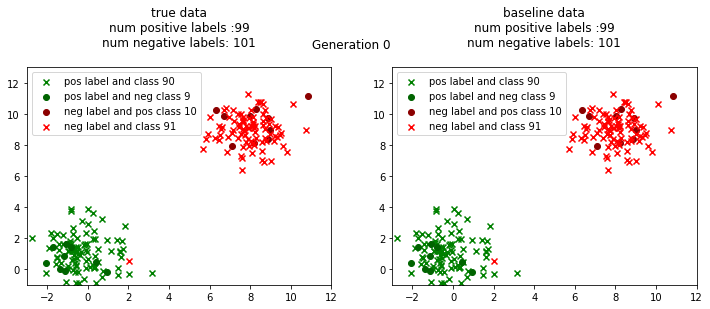

In [6]:
l.init_data()
l.plot_generation()

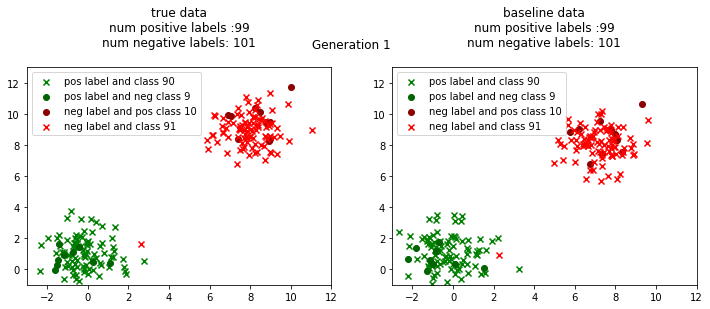

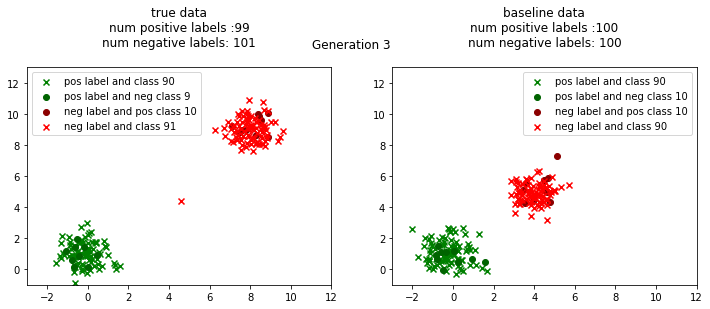

D:\Programme\Anaconda\envs\aif360\lib\site-packages\aif360\metrics\classification_metric.py:264: RuntimeWarning: invalid value encountered in double_scalars
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
D:\Programme\Anaconda\envs\aif360\lib\site-packages\aif360\metrics\classification_metric.py:265: RuntimeWarning: invalid value encountered in double_scalars
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


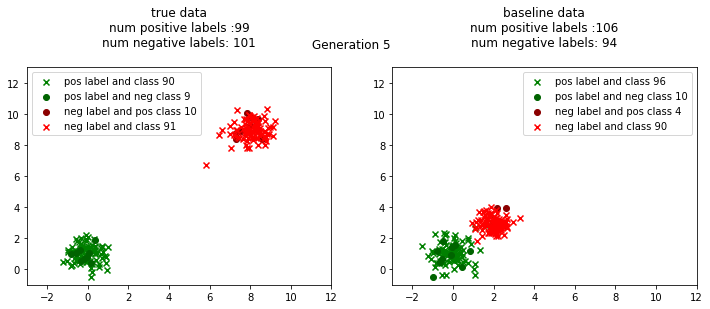

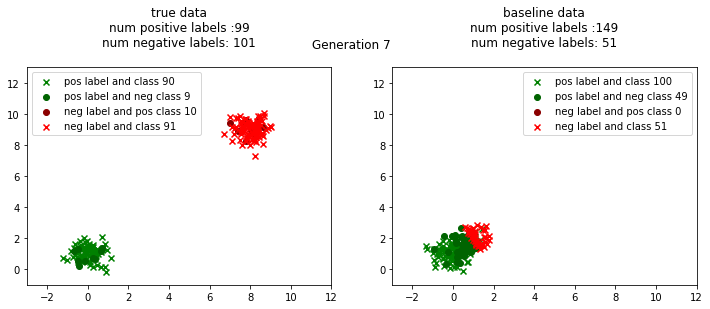

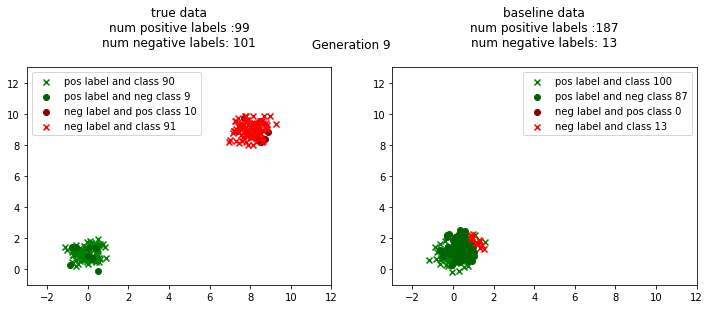

In [7]:
for i in range(10):

    l.run_generation()
    l._run_baseline_generation()
    if i % 2 == 0:
        l.plot_generation()

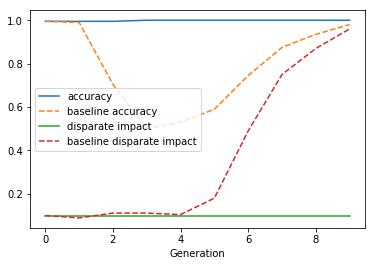

In [8]:
l.plot(["accuracy", "disparate impact"])

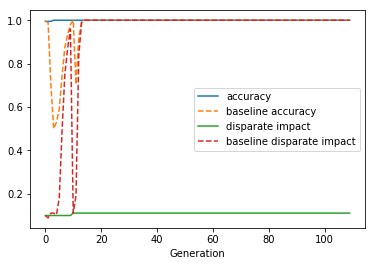

In [9]:
l.run(100)
l.plot(["accuracy", "disparate impact"])